In [1]:
# 预处理数据
import pandas as pd

# Define column names based on the Boston Housing dataset attributes
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Load the data from the file
data = pd.read_csv('../data/housing.data.txt', delim_whitespace=True, header=None)

# Assign column names to the dataframe
data.columns = column_names

# Save the dataframe to a CSV file
data.to_csv('boston_housing.csv', index=False)

# Print the dataframe
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

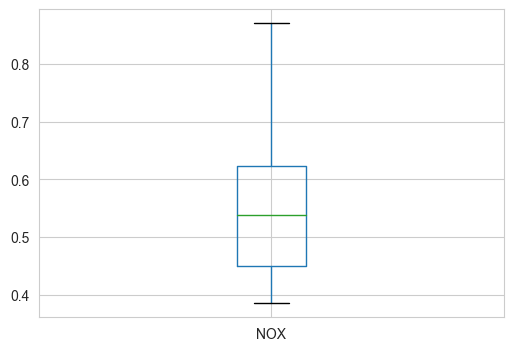

In [2]:
# 绘制箱线图
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('boston_housing.csv')

# 绘制某一列的箱线图
plt.figure(figsize=(6, 4))
df.boxplot(column=df.columns[4])
plt.show()

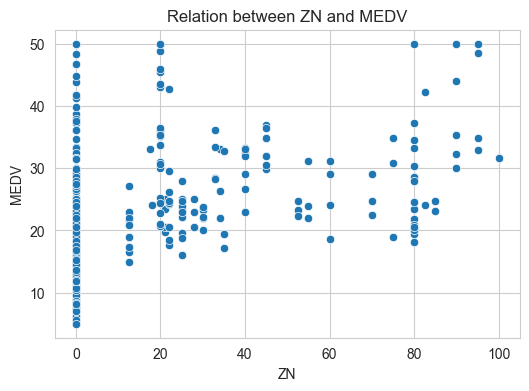

In [1]:
# 绘制散点图
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv('boston_housing.csv')

column = df.columns[1]
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df[column], y=df['MEDV'])
plt.title(f'Relation between {column} and MEDV')
plt.xlabel(column)
plt.ylabel('MEDV')
plt.show()


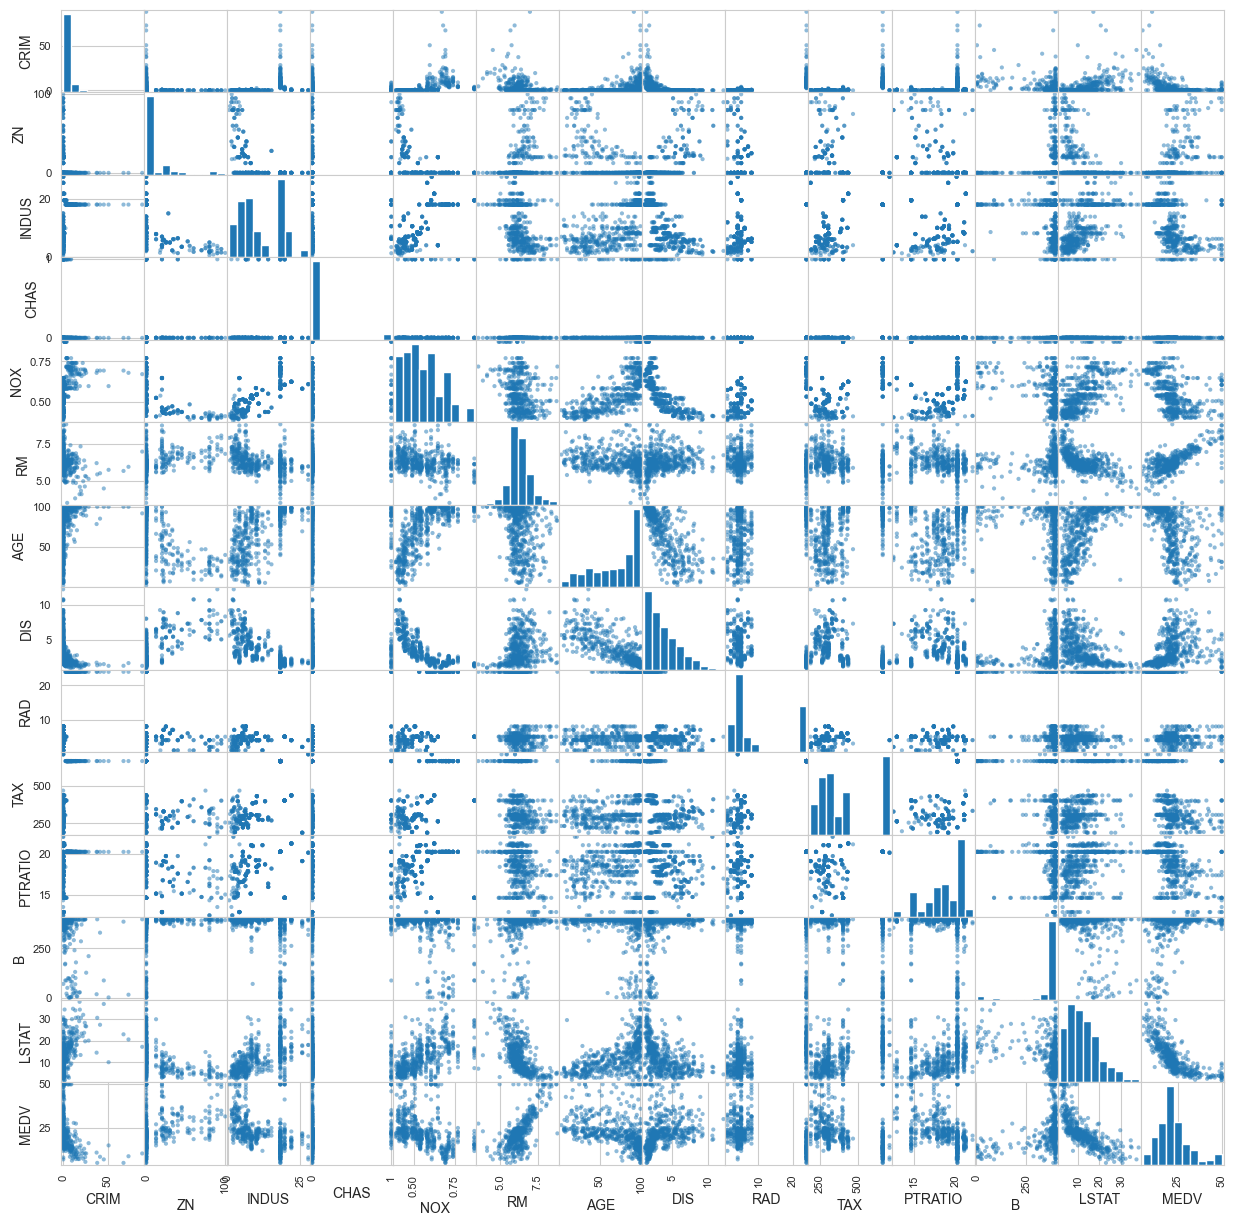

In [2]:
# 绘制矩阵图

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# 读取数据
df = pd.read_csv('boston_housing.csv')

# 绘制散点图矩阵
scatter_matrix(df, figsize=(15, 15))
# scatter_matrix(df, figsize=(15, 15), diagonal='kde')

# 显示图形
plt.show()

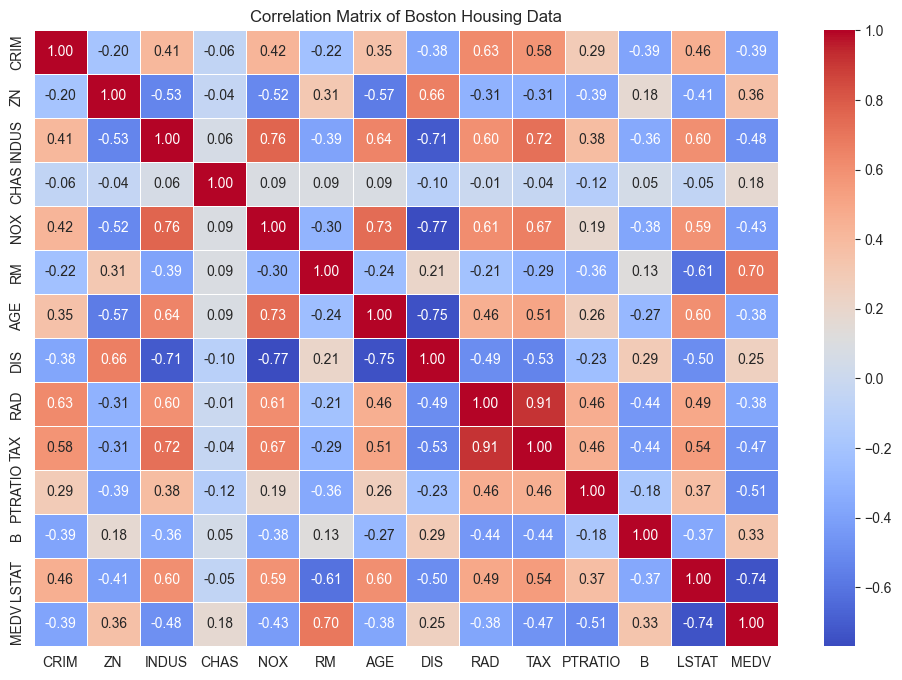

In [5]:
# 热力图
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('boston_housing.csv')

# 计算相关系数矩阵
corr_matrix = df.corr()

# 设置图形大小
plt.figure(figsize=(12, 8))

# 使用seaborn绘制热力图
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# 设置标题
plt.title('Correlation Matrix of Boston Housing Data')

# 显示图形
plt.show()


In [8]:
# 使用PolynomialFeatures进行特征构造（多项式）
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# 读取波士顿房价数据
data = pd.read_csv('boston_housing.csv')

# 分离目标变量 MEDV 和特征
target = data[['MEDV']]  # 目标变量
features = data.drop('MEDV', axis=1)  # 特征

# 使用 PolynomialFeatures 进行特征构造
poly = PolynomialFeatures(degree=2, include_bias=False)
features_poly = pd.DataFrame(poly.fit_transform(features), columns=poly.get_feature_names_out(features.columns))

# 合并构造出的特征和原始特征
data_all = pd.concat([features, features_poly], axis=1)

# 计算相关性矩阵
corr_matrix = data_all.corr().abs()

# 找到相关性大于0.9的特征对
high_corr = np.where(corr_matrix > 0.9)
high_corr = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

# 打印相关性大于0.9的特征对
print("Highly correlated features (correlation > 0.9):")
for feature_pair in high_corr:
    print(feature_pair)


Highly correlated features (correlation > 0.9):
('CRIM', 'CRIM')
('CRIM', 'CRIM INDUS')
('CRIM', 'CRIM NOX')
('CRIM', 'CRIM RM')
('CRIM', 'CRIM AGE')
('CRIM', 'CRIM DIS')
('CRIM', 'CRIM RAD')
('CRIM', 'CRIM TAX')
('CRIM', 'CRIM PTRATIO')
('CRIM', 'CRIM LSTAT')
('ZN', 'ZN')
('ZN', 'ZN^2')
('ZN', 'ZN NOX')
('ZN', 'ZN RM')
('ZN', 'ZN DIS')
('ZN', 'ZN TAX')
('ZN', 'ZN PTRATIO')
('ZN', 'ZN B')
('INDUS', 'INDUS')
('INDUS', 'INDUS^2')
('INDUS', 'INDUS NOX')
('INDUS', 'INDUS RM')
('INDUS', 'INDUS AGE')
('INDUS', 'INDUS TAX')
('INDUS', 'INDUS PTRATIO')
('CHAS', 'CHAS')
('CHAS', 'INDUS CHAS')
('CHAS', 'CHAS^2')
('CHAS', 'CHAS NOX')
('CHAS', 'CHAS RM')
('CHAS', 'CHAS AGE')
('CHAS', 'CHAS DIS')
('CHAS', 'CHAS TAX')
('CHAS', 'CHAS PTRATIO')
('CHAS', 'CHAS B')
('NOX', 'NOX')
('NOX', 'NOX^2')
('NOX', 'NOX AGE')
('RM', 'RM')
('RM', 'RM^2')
('AGE', 'AGE')
('AGE', 'NOX AGE')
('AGE', 'RM AGE')
('AGE', 'AGE^2')
('AGE', 'AGE PTRATIO')
('DIS', 'DIS')
('DIS', 'NOX DIS')
('DIS', 'RM DIS')
('DIS', 'DIS^2')
('D

In [12]:
# 统计值构造法（本例子中是借助方差——F检验）
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# 加载数据集
data = pd.read_csv('boston_housing.csv')

# 分离特征和目标变量
X = data.drop(columns=['MEDV'])  # 特征
y = data['MEDV']  # 目标变量

# 构造新特征
X_new = pd.DataFrame()

# 平均房间数
X_new['RM'] = X['RM']
X_new['RM^2'] = X['RM'] ** 2
X_new['RM^3'] = X['RM'] ** 3

# 犯罪率
X_new['CRIM'] = X['CRIM']
X_new['log(CRIM)'] = np.log(X['CRIM'] + 1)  # 为避免log(0)情况，加1

# 市中心距离
X_new['DIS'] = X['DIS']
X_new['1/DIS'] = 1 / (X['DIS'] + 1e-5)  # 加一个小值避免除0错误

# 财产税率
X_new['B'] = X['B']
X_new['sqrt(B)'] = np.sqrt(X['B'])

# 选择相关性较强的特征
selector = SelectKBest(score_func=f_regression, k=6)
selector.fit(X_new, y)
mask = selector.get_support()

# 输出相关性较强的特征
print(X_new.columns[mask])


Index(['RM', 'RM^2', 'RM^3', 'CRIM', 'log(CRIM)', 'B'], dtype='object')


In [1]:
# 算术运算构造法是指通过对原有特征进行算术运算得到新的特征
import pandas as pd
import numpy as np

# 读取波士顿房价数据
data = pd.read_csv('boston_housing.csv', sep=',', header=0)

# 构造新特征
data['RM_LSTAT'] = data['RM'] * data['LSTAT']  # 房间数乘低收入人群比例
data['RM_PTRATIO'] = data['RM'] / data['PTRATIO']  # 房间数除以学生与教师比例
data['RM_TAX'] = data['RM'] / data['TAX']  # 房间数除以房产税
data['AGE_PTRATIO'] = data['AGE'] / data['PTRATIO']  # 楼龄除以学生与教师比例
data['INDUS_LSTAT'] = data['INDUS'] * data['LSTAT']  # 行业比例乘低收入人群比例

# 计算每个特征与房价的相关系数
corrs = data.corr()['MEDV'].abs().sort_values(ascending=False)

# 选择与房价相关性较高的特征（相关系数大于或等于 0.5）
selected_features = corrs[corrs >= 0.5].index.tolist()

# 移除目标变量 'MEDV'（我们不需要它作为特征）
if 'MEDV' in selected_features:
    selected_features.remove('MEDV')

# 打印相关系数较高的特征
print("Selected features with correlation >= 0.5 to MEDV:")
print(selected_features)

# 打印相关系数列表（按绝对值降序排序）
print("\nCorrelation values:")
print(corrs)


Selected features with correlation >= 0.5 to MEDV:
['LSTAT', 'RM_LSTAT', 'RM_PTRATIO', 'RM', 'INDUS_LSTAT', 'RM_TAX', 'PTRATIO']

Correlation values:
MEDV           1.000000
LSTAT          0.737663
RM_LSTAT       0.729524
RM_PTRATIO     0.724151
RM             0.695360
INDUS_LSTAT    0.652379
RM_TAX         0.625102
PTRATIO        0.507787
INDUS          0.483725
TAX            0.468536
NOX            0.427321
CRIM           0.388305
RAD            0.381626
AGE            0.376955
ZN             0.360445
B              0.333461
DIS            0.249929
AGE_PTRATIO    0.207138
CHAS           0.175260
Name: MEDV, dtype: float64
